<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-설명" data-toc-modified-id="데이터-설명-1">데이터 설명</a></span><ul class="toc-item"><li><span><a href="#분석목적" data-toc-modified-id="분석목적-1.1">분석목적</a></span></li><li><span><a href="#데이터-상세-설명" data-toc-modified-id="데이터-상세-설명-1.2">데이터 상세 설명</a></span></li></ul></li><li><span><a href="#EDA로-얻은-결과" data-toc-modified-id="EDA로-얻은-결과-2">EDA로 얻은 결과</a></span></li><li><span><a href="#데이터-생성-및-전처리" data-toc-modified-id="데이터-생성-및-전처리-3">데이터 생성 및 전처리</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#comment_1" data-toc-modified-id="comment_1-3.0.1">comment_1</a></span></li><li><span><a href="#comment_2" data-toc-modified-id="comment_2-3.0.2">comment_2</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4">EDA</a></span><ul class="toc-item"><li><span><a href="#시간,-요일,-월별-거래액" data-toc-modified-id="시간,-요일,-월별-거래액-4.1">시간, 요일, 월별 거래액</a></span><ul class="toc-item"><li><span><a href="#comment_3" data-toc-modified-id="comment_3-4.1.1">comment_3</a></span></li></ul></li><li><span><a href="#국가별-거래액" data-toc-modified-id="국가별-거래액-4.2">국가별 거래액</a></span><ul class="toc-item"><li><span><a href="#comment_4" data-toc-modified-id="comment_4-4.2.1">comment_4</a></span></li></ul></li><li><span><a href="#고객-10분위-분석" data-toc-modified-id="고객-10분위-분석-4.3">고객 10분위 분석</a></span><ul class="toc-item"><li><span><a href="#comment_5" data-toc-modified-id="comment_5-4.3.1">comment_5</a></span></li></ul></li><li><span><a href="#코호트-분석" data-toc-modified-id="코호트-분석-4.4">코호트 분석</a></span><ul class="toc-item"><li><span><a href="#comment_6" data-toc-modified-id="comment_6-4.4.1">comment_6</a></span></li></ul></li><li><span><a href="#고객-세그먼트(RFM을-활용한-K-means-군집분석)" data-toc-modified-id="고객-세그먼트(RFM을-활용한-K-means-군집분석)-4.5">고객 세그먼트(RFM을 활용한 K-means 군집분석)</a></span><ul class="toc-item"><li><span><a href="#comment_7" data-toc-modified-id="comment_7-4.5.1">comment_7</a></span></li></ul></li></ul></li></ul></div>

# 데이터 설명

## 분석목적

주제: `E-Commerce Data EDA & Customer Segmentation`

매출 KPI와 고객 행동 분석을 통해 비즈니스 현황을 진단하고, 실적 개선에 필요한 시나리오 도출이 목적입니다.

주로 SQL을 활용해 분석하고, 간단한 전처리, 시각화, 통계분석 영역에 Python을 활용하는 방향으로 진행하겠습니다.

## 데이터 상세 설명

데이터 출처: Kaggle의 공유 데이터셋 E-Commerce Data - Actual transactions from UK retailer ([UK-Commerce](https://www.kaggle.com/carrie1/ecommerce-data))

데이터 기간: 2010/12/01 ~ 2011/12/09

※ Company: UK-based and registered non-store online retail

※ Products for selling: Mainly all-occasion gifts

※ Customers: Most are wholesalers (local or international)

분석할 UK-Commerce 데이터는 다음과 같이 구성되어 있습니다.

| InvoiceNo | StockCode | Description | Quantity | UnitPrice | CustomerID | Country        | InvoiceDate |
|:---------:|-----------|-------------|----------|-----------|------------|----------------|-------------|
| 536356    | 85123A    | HOLDER      | 6        | 2.55      | 17850      | United Kingdom | 12/1/2010 8:26  |

※ InvoiceNo: 주문번호

※ StockCode: 상품번호

※ Description: 상품명

※ Quantity: 구매 상품 수

※ UnitPrice: 개당 판매 가격

※ CustomerID: 고객 번호

※ Country: 판매 국가

※ InvoiceDate: 판매 일자 및 시간

# EDA로 얻은 결과

# 데이터 생성 및 전처리

In [36]:
# 데이터 분석, 시각화에 필요한 패키지를 불러옵니다.
# db가 없으므로 read_csv로 불러온 csv파일이 db의 테이블이라고 가정하겠습니다.
# pandasql 패키지를 활용해 쿼리문을 작성하겠습니다.
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('font', family="Malgun Gothic", size=15)
mpl.rc('axes', unicode_minus=False)

In [37]:
#  uk_commerce 데이터를 불러옵니다.
data = pd.read_csv("C:/Users/Seo Dongyun/Downloads/ecommerce-data/data.csv", encoding = "ISO-8859-1")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [38]:
# 컬럼명을 모두 소문자로 변경합니다.
data = data.rename(str.lower, axis=1)
data.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [39]:
# invoicedate 컬럼을 날짜 타입으로 수정합니다.
data["invoicedate"] = pd.to_datetime(data["invoicedate"])
print(data["invoicedate"].dtype)

datetime64[ns]


In [40]:
# 데이터 타입, Null값 존재 여부를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
# 컬럼별 Null값의 개수를 확인합니다.
data.shape[0] - data.count()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [42]:
# customerid 컬럼에 Null값이 있는 행을 삭제합니다.
print(data.shape)
data = data.dropna(subset=["customerid"])
print(data.shape)

(541909, 8)
(406829, 8)


### comment_1
총 541,909개의 행과 8개 컬럼을 가지고 있으며, description, customerid에 Null값이 존재합니다. description의 결측 비중은 약 0%, customerid의 결측 비중은  약 25%입니다.

customerid 컬럼은 앞으로 진행할 재구매, 10분위 분석, 고객 분류 분석 등에 필요한 핵심 변수입니다.

custoerid 결측치가 포함된 행만 제외하고 분석하겠습니다.

In [43]:
# 요약통계량을 확인합니다.
# 특이사항은 quantity의 최솟값이 마이너스이고 unitprice의 최솟값이 0입니다.
data.describe()

,quantity,unitprice,customerid
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
# quantity가 마이너스인 데이터는 제외하겠습니다.
data = data[data["quantity"] > 0]
data.shape

(397924, 8)

In [45]:
# unitprice가 0인 데이터는 총 40개입니다.
print(data[data["unitprice"] == 0].shape)
data_price_zero = data[data["unitprice"] == 0]
data_price_zero.head()

(40, 8)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [46]:
# 월별 unitprice가 0인 데이터의 총 개수입니다.
# 6월을 제외한 매달 unitprice가 0인 데이터가 존재합니다.
data_price_zero["invoicedate"].dt.month \
                                                 .value_counts() \
                                                 .sort_index()

1      3
2      1
3      2
4      2
5      2
7      2
8      6
9      2
10     3
11    14
12     3
Name: invoicedate, dtype: int64

### comment_2
정확히 어떤 이유인지 알기 어려우나, 6월을 제외한 매달 고객에게 무료 상품 구매 혜택을 주고 있습니다.

quantity가 마이너스인 데이터를 제외한 397,924개 행 데이터로 분석을 진행합니다.

# EDA

## 시간, 요일, 월별 거래액

In [47]:
# 시간, 요일, 월별 거래액을 조회합니다.
query1 = """
    SELECT dayofweek, SUM(sales) AS sales
    FROM (SELECT  CASE CAST (strftime('%w', invoicedate) as integer)
                WHEN 0 THEN 'Sunday'
                WHEN 1 THEN 'Monday'
                WHEN 2 THEN 'Tuesday'
               WHEN 3 THEN 'Wednesday'
               WHEN 4 THEN 'Thursday'
               WHEN 5 THEN 'Friday' ELSE 'Saturday' END AS dayofweek,
               quantity * unitprice AS sales
               FROM data) A
    GROUP BY dayofweek;
"""

query2 = """
    SELECT SUBSTR(invoicedate, 1, 7) AS month, SUM(quantity * unitprice) AS sales
    FROM data
    GROUP BY month
    ORDER BY month ASC;
"""

query3 = """
    SELECT SUBSTR(invoicedate, 12, 2) AS time, SUM(quantity * unitprice) AS sales
    FROM data
    GROUP BY time;
"""

sales_day = sqldf(query1,locals())
sales_month = sqldf(query2, locals())
sales_time = sqldf(query3, locals())

In [48]:
print(sales_day)
print("=" * 50)
print(sales_month)
print("=" * 50)
print(sales_time)

   dayofweek        sales
0     Friday  1485917.401
1     Monday  1367146.411
2     Sunday   792514.221
3   Thursday  1976859.070
4    Tuesday  1700634.631
5  Wednesday  1588336.170
      month        sales
0   2010-12   572713.890
1   2011-01   569445.040
2   2011-02   447137.350
3   2011-03   595500.760
4   2011-04   469200.361
5   2011-05   678594.560
6   2011-06   661213.690
7   2011-07   600091.011
8   2011-08   645343.900
9   2011-09   952838.382
10  2011-10  1039318.790
11  2011-11  1161817.380
12  2011-12   518192.790
   time        sales
0    06        4.250
1    07    31059.210
2    08   282115.630
3    09   842605.171
4    10  1261192.571
5    11  1104558.750
6    12  1378571.480
7    13  1173264.750
8    14   995629.371
9    15   966191.750
10   16   468885.800
11   17   234413.521
12   18   104954.430
13   19    49028.460
14   20    18932.760


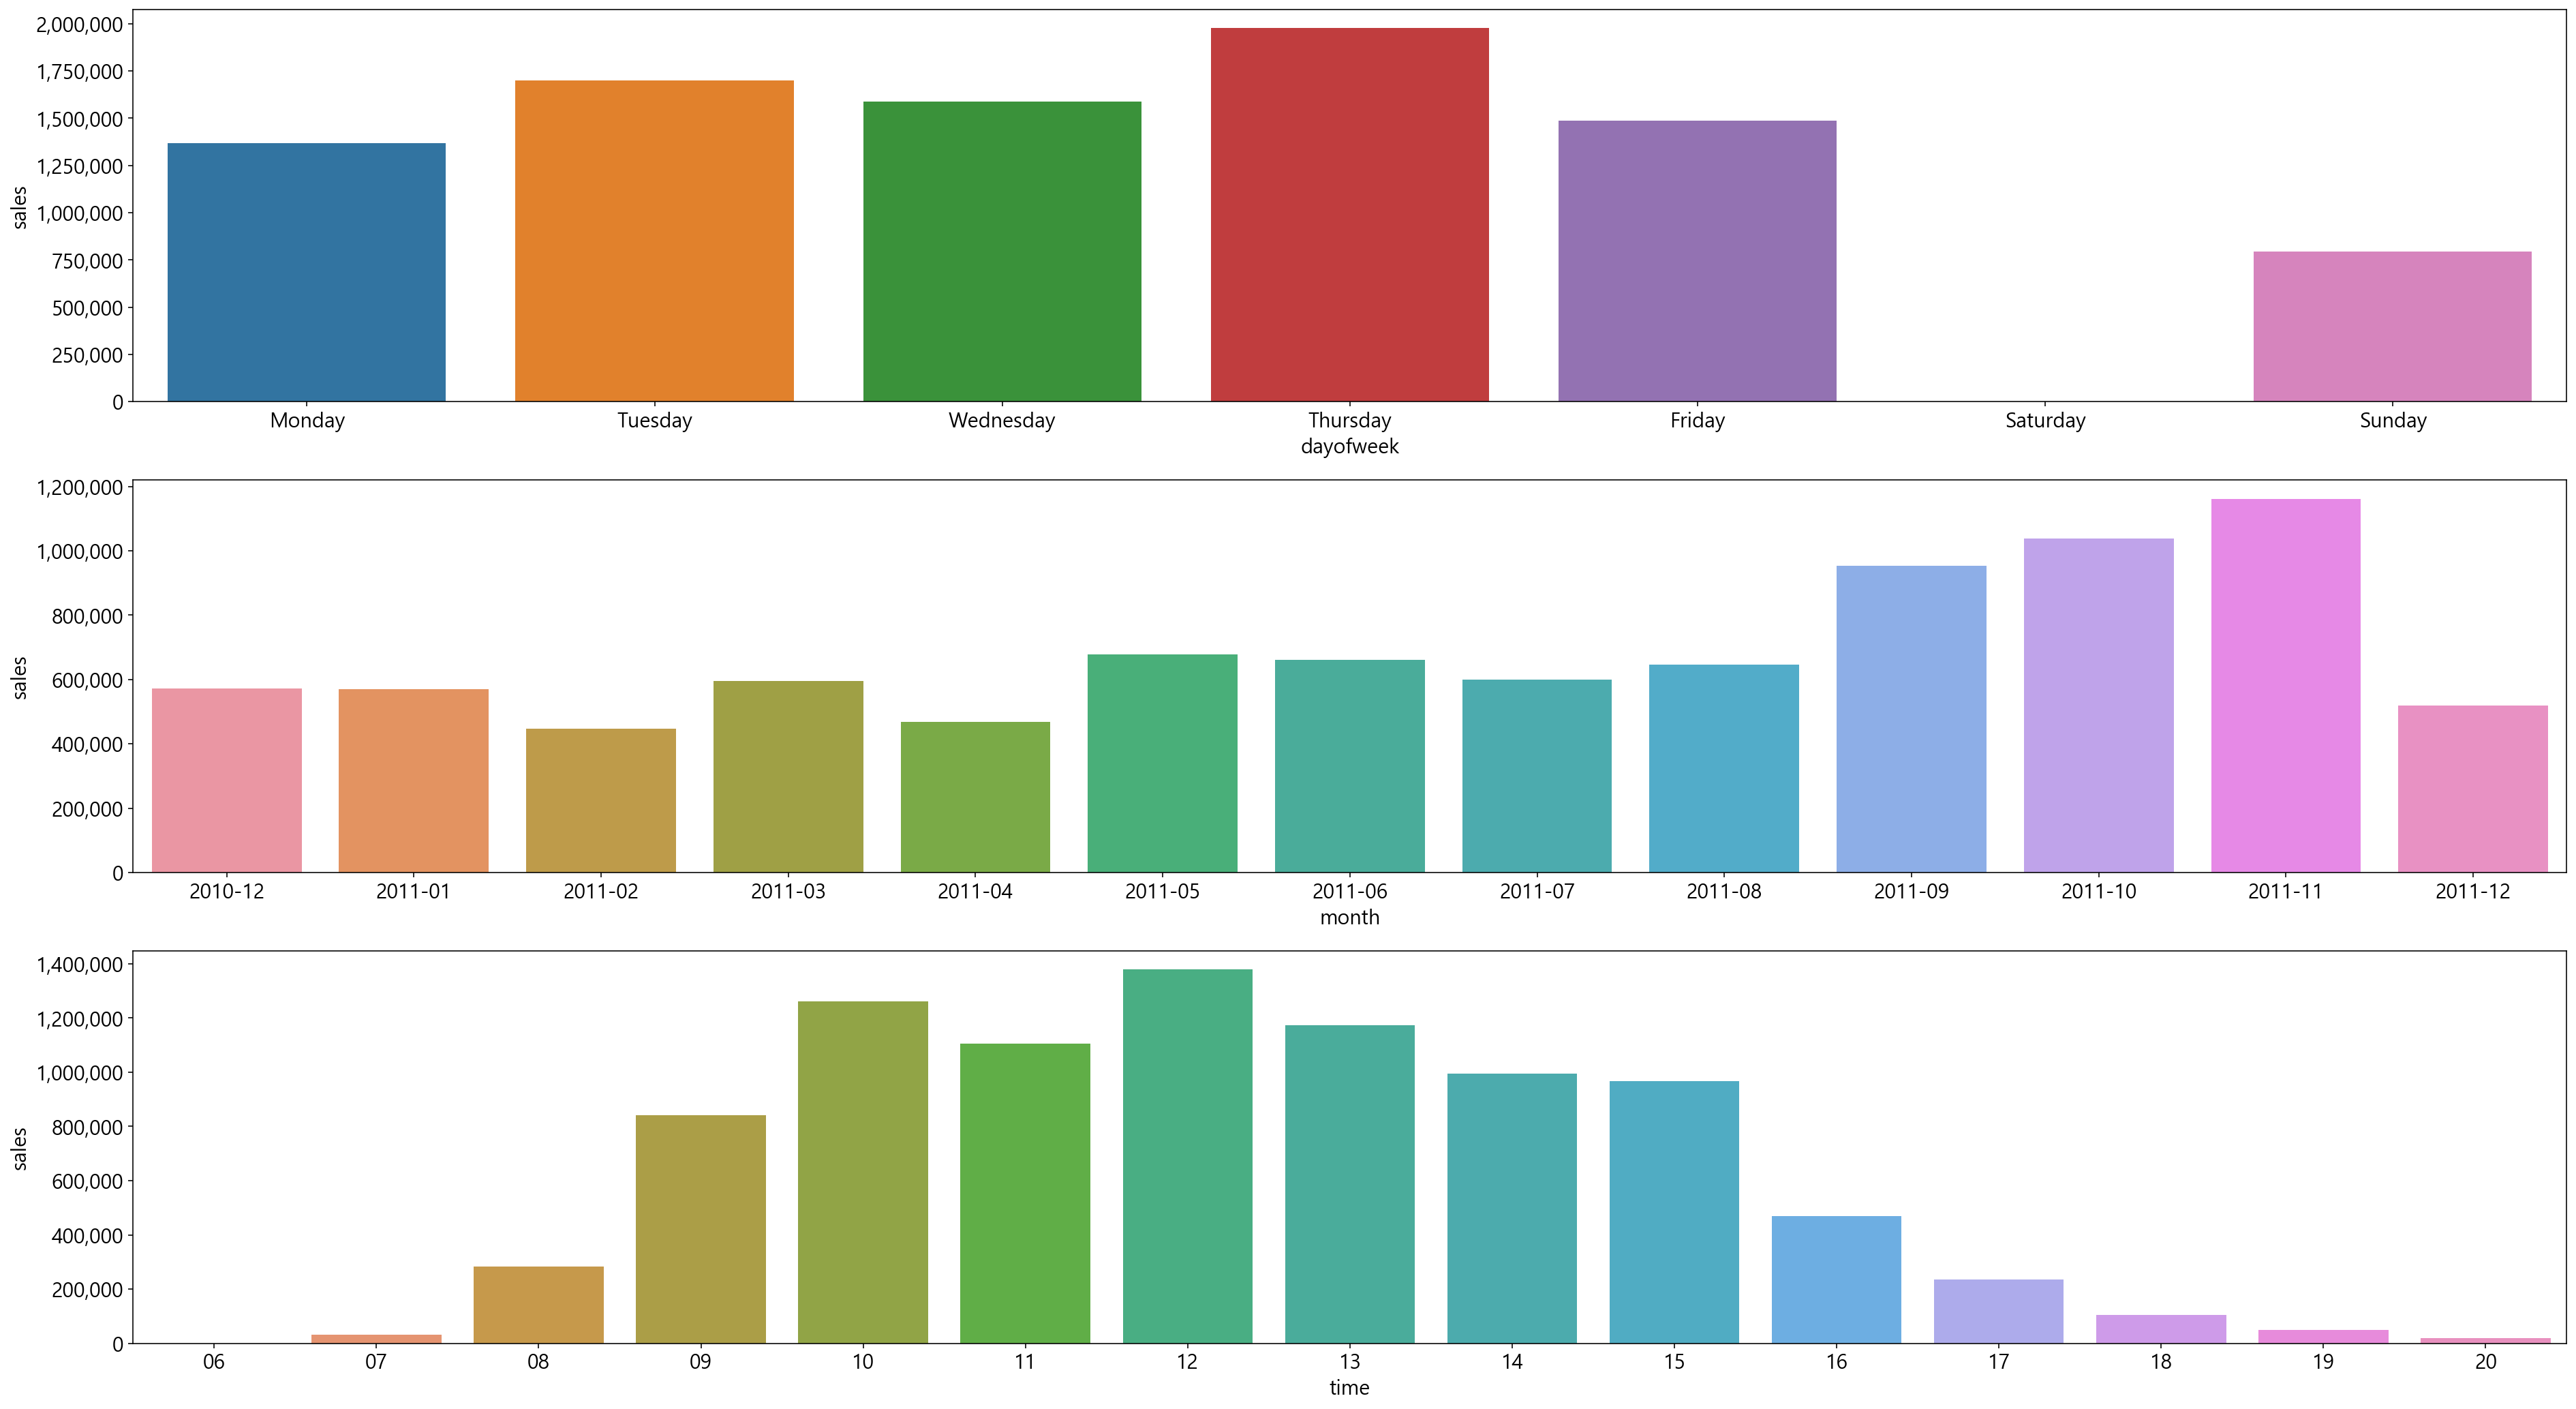

In [49]:
# 시간, 요일, 월별 거래액 흐름을 시각화를 통해 확인합니다.
# 거래액을 천단위(,)로 출력합니다.
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 1,nrows = 3,figsize = [32,18])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int (x))))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int (x))))
ax3.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int (x))))

sns.barplot(data=sales_day, x='dayofweek', y='sales', ci = None, ax=ax1, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.barplot(data=sales_month, x='month',  y='sales', ci = None, ax = ax2)
sns.barplot(data=sales_time, x="time", y="sales", ci = None, ax = ax3)

### comment_3
1) 2010/12 ~ 2011/12 기간내 토요일의 거래액은 데이터에 존재하지 않습니다.

2) 주중 목요일의 매출 비중이 1순위입니다.

3) 연중 가을(9월 ~ 11월)의 거래액 비중이 타계절보다 높습니다. (2011년 12월의 데이터는 9일까지 존재하므로 완전하지 않습니다.)

4) 12시에 거래액이 최대로 발생합니다. 21시 ~ 05시 거래액은 데이터에 존재하지 않습니다.

## 국가별 거래액

In [50]:
# 국가별 거래액을 구합니다.
query = """
   SELECT country, SUM(quantity * unitprice) AS sales
   FROM data
   GROUP BY country
   ORDER BY sales DESC;
"""
sales_country = sqldf(query, locals())

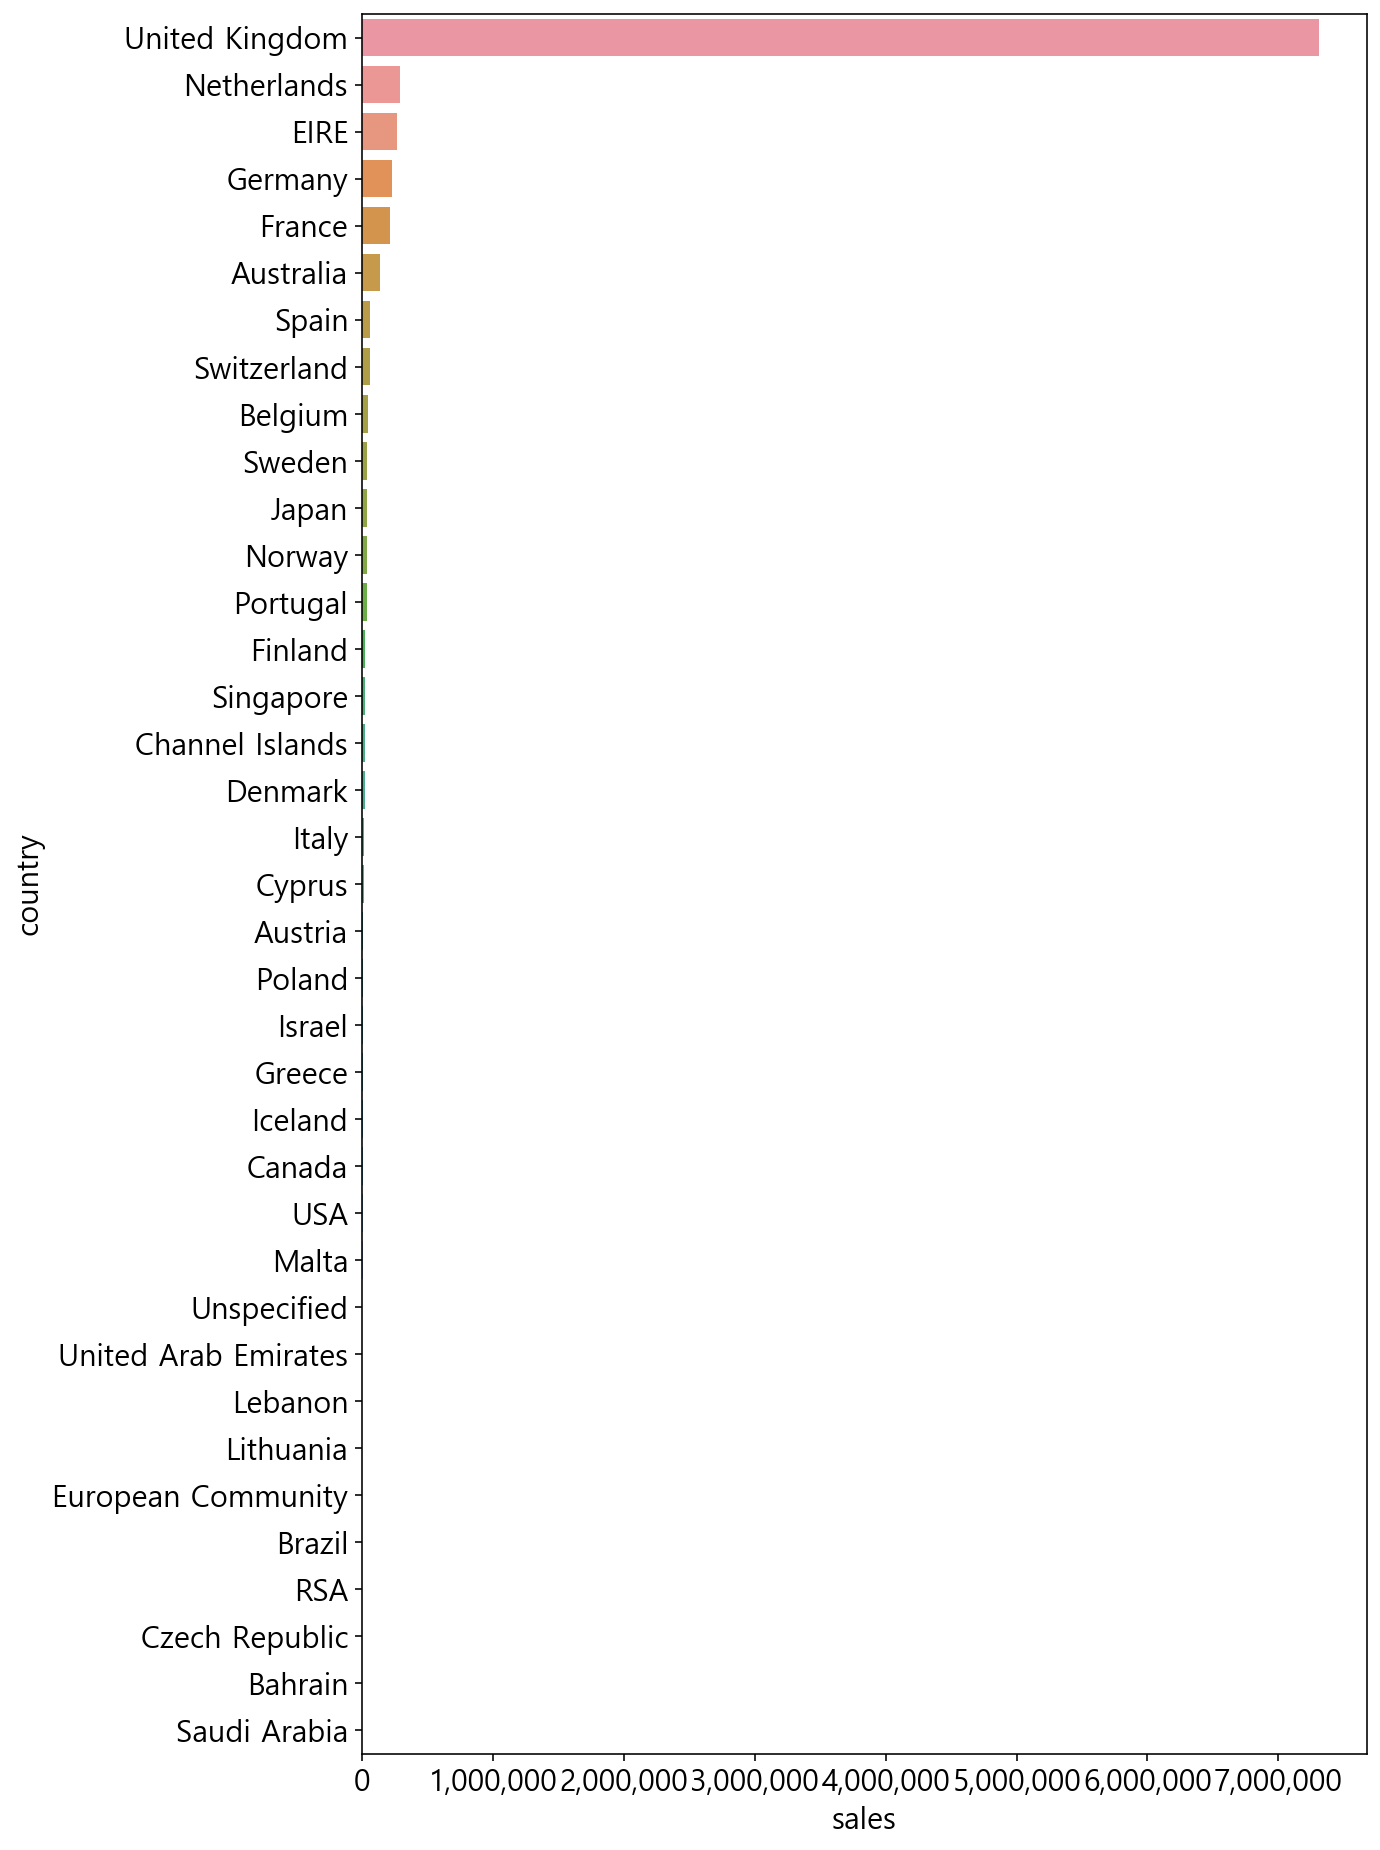

In [51]:
# 국가별 거래액을 시각화를 통해 확인합니다.
# 거래액을 천단위(,)로 출력합니다.
fig, ax = plt.subplots(figsize=[9, 16])
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int (x))))
sns.barplot(data=sales_country, x='sales',  y='country', ci = None, ax = ax, orient="h")

In [52]:
# 영국 이외 국가의 거래액 수준을 알기 위해 피벗테이블로 수치를 확인합니다.
# 가독성을 위해 천단위로 스타일 양식을 변경합니다.
table = pd.pivot_table(data=sales_country, index="country", values="sales")
table = table.sort_values(by="sales", ascending=False)
df = pd.DataFrame(table["sales"].astype("int64"))
df.style.format("{:,}")

,sales
country,
United Kingdom,"7,308,391"
Netherlands,"285,446"
EIRE,"265,545"
Germany,"228,867"
France,"209,024"
Australia,"138,521"
Spain,"61,577"
Switzerland,"56,443"
Belgium,"41,196"


In [53]:
sales_all = int(df.sum().values)
sales_not_uk = int(df.loc[df.index != "United Kingdom"].sum().values)
sales_not_uk_relative = (sales_not_uk / sales_all) * 100
print(f"전체 국가의 거래액은 {sales_all:,} 입니다.")
print(f"영국 이외 국가의 거래액은 {sales_not_uk:,} 입니다.")
print(f"영국 이외 국가의 거래액 비중은 {sales_not_uk_relative:.0f}% 입니다.")

전체 국가의 거래액은 8,911,391 입니다.
영국 이외 국가의 거래액은 1,603,000 입니다.
영국 이외 국가의 거래액 비중은 18% 입니다.


### comment_4
국가별 거래액을 시각화한 결과 영국의 거래액 비중이 약 82%로 제일 높습니다.

영국 이외 국가 거래액 비중은 약 18%입니다.

해외 구매도 발생하고 있고 대부분 유럽 국가입니다.

## 고객 10분위 분석

거래액을 기준으로 고객을 10분위로 나누어 분석하겠습니다.

고객에게 부여된 고유한 id별 1년 간의 총 거래액을 구한 뒤, 거래액을 기준으로 랭크를 생성합니다.

해당 분석의 목적은 매출이 VIP에게 집중되어 있는지 확인하는 것입니다.

In [54]:
#  총 구매 고객 수는 4,372명이고 거래액은 8,300,066입니다.
query = """
    SELECT COUNT(DISTINCT customerid), ROUND(SUM(quantity * unitprice), 0)
    FROM data;
"""

sqldf(query, locals())

,COUNT(DISTINCT customerid),"ROUND(SUM(quantity * unitprice), 0)"
0,4339,8911408.0


In [55]:
# 거래액에 따른 Rank를 생성합니다.
query = """
    SELECT *, DENSE_RANK() OVER(ORDER BY sales DESC) AS rnk
    FROM (SELECT customerid, SUM(quantity * unitprice) AS sales
                FROM data
                GROUP BY customerid) A
"""
sqldf(query, locals()).head()

,customerid,sales,rnk
0,14646.0,280206.02,1
1,18102.0,259657.30,2
2,17450.0,194550.79,3
3,16446.0,168472.50,4
4,14911.0,143825.06,5


In [56]:
# 위에서 구한 Rank 테이블에 서브쿼리를 이용해 고객별 분위수를 구합니다.
query = """SELECT *, CASE WHEN rnk <= 440 THEN "quantile_01"
                                            WHEN rnk <= 880 THEN "quantile_02"
                                            WHEN rnk <= 1320 THEN "quantile_03"
                                            WHEN rnk <= 1760 THEN "quantile_04"
                                            WHEN rnk <= 2200 THEN "quantile_05"
                                            WHEN rnk <= 2640 THEN "quantile_06"
                                            WHEN rnk <= 3080 THEN "quantile_07"
                                            WHEN rnk <= 3520 THEN "quantile_08"
                                            WHEN rnk <= 3960 THEN "quantile_09"
                                            WHEN rnk <= 4372 THEN "quantile_10" END AS "quantile"
                FROM (SELECT *, DENSE_RANK() OVER(ORDER BY sales DESC) AS rnk
                            FROM (SELECT customerid, SUM(quantity * unitprice) AS sales
                                        FROM data
                                        GROUP BY customerid) A) B;
"""
customer_quantile = sqldf(query, locals())
customer_quantile

,customerid,sales,rnk,quantile
0,14646.0,280206.02,1,quantile_01
1,18102.0,259657.30,2,quantile_01
2,17450.0,194550.79,3,quantile_01
3,16446.0,168472.50,4,quantile_01
4,14911.0,143825.06,5,quantile_01
...,...,...,...,...
4334,17956.0,12.75,4281,quantile_10
4335,16454.0,6.90,4282,quantile_10
4336,14792.0,6.20,4283,quantile_10
4337,16738.0,3.75,4284,quantile_10


In [57]:
# 분위수별 거래액을 구합니다.
query = """
    SELECT quantile, SUM(sales) AS sales
    FROM customer_quantile
    GROUP BY quantile
    ORDER BY quantile ASC;
"""
tmp = sqldf(query, locals())
tmp

,quantile,sales
0,quantile_01,5491228.840
1,quantile_02,1182798.911
2,quantile_03,728076.510
3,quantile_04,489876.130
4,quantile_05,344097.281
5,quantile_06,251466.661
6,quantile_07,178339.871
7,quantile_08,128863.510
8,quantile_09,83623.630
9,quantile_10,33036.560


In [58]:
# 총 거래액에서 분위수별 거래액의 비중을 구합니다.
query = """
    SELECT *, ROUND(sales / 8300066, 2) AS relative_freq
    FROM tmp;
"""
sqldf(query, locals())

,quantile,sales,relative_freq
0,quantile_01,5491228.840,0.66
1,quantile_02,1182798.911,0.14
2,quantile_03,728076.510,0.09
3,quantile_04,489876.130,0.06
4,quantile_05,344097.281,0.04
5,quantile_06,251466.661,0.03
6,quantile_07,178339.871,0.02
7,quantile_08,128863.510,0.02
8,quantile_09,83623.630,0.01
9,quantile_10,33036.560,0.00


### comment_5
상위 20% 고객의 거래액이 전체 거래액에서 약 80%를 차지합니다.

기존에 알려진 80:20 법칙과 동일한 형태를 보입니다.

해당 기업의 매출은 VIP에게 집중되어 있습니다.

## 코호트 분석

최초 구매 월을 기준으로 코호트 그룹을 생성한 후, 월 기준으로 시간의 흐름에 따른 각 코호트의 리텐션을 확인하겠습니다.

In [59]:
# 고객별 최초 구매일을 구합니다.
query = """
    SELECT customerid, MIN(invoicedate) AS min_dt
    FROM data
    GROUP BY 1;
"""
sqldf(query, locals())

,customerid,min_dt
0,12346.0,2011-01-18 10:01:00.000000
1,12347.0,2010-12-07 14:57:00.000000
2,12348.0,2010-12-16 19:09:00.000000
3,12349.0,2011-11-21 09:51:00.000000
4,12350.0,2011-02-02 16:01:00.000000
...,...,...
4334,18280.0,2011-03-07 09:52:00.000000
4335,18281.0,2011-06-12 10:53:00.000000
4336,18282.0,2011-08-05 13:35:00.000000
4337,18283.0,2011-01-06 14:14:00.000000


In [60]:
# 고객별 모든 구매일을 구합니다.
query = """
    SELECT customerid, invoicedate, unitprice * quantity AS sales
    FROM data;
"""
sqldf(query, locals())

,customerid,invoicedate,sales
0,17850.0,2010-12-01 08:26:00.000000,15.30
1,17850.0,2010-12-01 08:26:00.000000,20.34
2,17850.0,2010-12-01 08:26:00.000000,22.00
3,17850.0,2010-12-01 08:26:00.000000,20.34
4,17850.0,2010-12-01 08:26:00.000000,20.34
...,...,...,...
397919,12680.0,2011-12-09 12:50:00.000000,10.20
397920,12680.0,2011-12-09 12:50:00.000000,12.60
397921,12680.0,2011-12-09 12:50:00.000000,16.60
397922,12680.0,2011-12-09 12:50:00.000000,16.60


In [61]:
# 위에서 구한 2개 테이블을 고객번호를 기준으로 join하겠습니다.
# 고객별 최초 구매일과 구매일을 구했습니다.
query = """
    SELECT A.customerid, min_dt, invoicedate
    FROM (SELECT customerid, MIN(invoicedate) AS min_dt
                FROM data
                GROUP BY customerid) A
    LEFT JOIN (SELECT customerid, invoicedate FROM data) B ON A.customerid = B.customerid;
"""
order = sqldf(query, locals())
order

,customerid,min_dt,invoicedate
0,12346.0,2011-01-18 10:01:00.000000,2011-01-18 10:01:00.000000
1,12347.0,2010-12-07 14:57:00.000000,2010-12-07 14:57:00.000000
2,12347.0,2010-12-07 14:57:00.000000,2010-12-07 14:57:00.000000
3,12347.0,2010-12-07 14:57:00.000000,2010-12-07 14:57:00.000000
4,12347.0,2010-12-07 14:57:00.000000,2010-12-07 14:57:00.000000
...,...,...,...
397919,18287.0,2011-05-22 10:39:00.000000,2011-10-12 10:23:00.000000
397920,18287.0,2011-05-22 10:39:00.000000,2011-10-12 10:23:00.000000
397921,18287.0,2011-05-22 10:39:00.000000,2011-10-28 09:29:00.000000
397922,18287.0,2011-05-22 10:39:00.000000,2011-10-28 09:29:00.000000


In [62]:
# min_dt, invoicedate 컬럼을 날짜 데이터타입으로 변환합니다.
order["min_dt"] = pd.to_datetime(order["min_dt"])
print(order["min_dt"].dtype)

order["invoicedate"] = pd.to_datetime(order["invoicedate"])
print(order["invoicedate"].dtype)

datetime64[ns]
datetime64[ns]


In [63]:
# min_dt, invoicedate 컬럼으로부터 연도, 월, 일자 데이터만 추출해 별도 컬럼을 생성합니다.
order["min_dt_new"] = pd.to_datetime(order["min_dt"].map(lambda x: x.strftime('%Y-%m')))
order["invoicedate_new"] = pd.to_datetime(order["invoicedate"].map(lambda x: x.strftime('%Y-%m')))
order.sample(10)

,customerid,min_dt,invoicedate,min_dt_new,invoicedate_new
252449,16033.0,2010-12-05 10:36:00,2011-02-07 13:50:00,2010-12-01,2011-02-01
237766,15804.0,2011-05-25 10:12:00,2011-06-22 10:28:00,2011-05-01,2011-06-01
148869,14562.0,2011-02-08 14:45:00,2011-11-10 10:49:00,2011-02-01,2011-11-01
176429,14911.0,2010-12-01 14:05:00,2011-03-04 14:02:00,2010-12-01,2011-03-01
124905,14243.0,2010-12-09 08:34:00,2011-02-24 11:38:00,2010-12-01,2011-02-01
364109,17802.0,2010-12-02 13:44:00,2011-06-12 14:57:00,2010-12-01,2011-06-01
232957,15719.0,2011-01-06 12:31:00,2011-06-14 11:36:00,2011-01-01,2011-06-01
219852,15521.0,2011-03-30 09:15:00,2011-05-11 12:47:00,2011-03-01,2011-05-01
339475,17449.0,2010-12-15 10:57:00,2011-10-25 17:21:00,2010-12-01,2011-10-01
329718,17315.0,2010-12-17 12:24:00,2011-10-13 10:09:00,2010-12-01,2011-10-01


In [64]:
# 최초 구매일과 구매일의 월 간격 데이터를 diff_month 컬럼에 저장합니다.
order["diff_month"] =( (order["invoicedate_new"] - order["min_dt_new"]) / 30).dt.components.days
order.head()

,customerid,min_dt,invoicedate,min_dt_new,invoicedate_new,diff_month
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,2011-01-01,2011-01-01,0
1,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,2010-12-01,2010-12-01,0
2,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,2010-12-01,2010-12-01,0
3,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,2010-12-01,2010-12-01,0
4,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,2010-12-01,2010-12-01,0


In [65]:
# 최초 구매 월별로 그룹을 생성하고 월 간격별 PU를 확인합니다.
cohort_pivot = pd.DataFrame(order.groupby(["min_dt_new", "diff_month"])["customerid"].nunique())
cohort_pivot.columns=["pu"]
cohort_pivot

pu
min_dt_new diff_month     
2010-12-01 0           885
           1           324
           2           286
           3           340
           4           321
...                    ...
2011-10-01 1            86
           2            41
2011-11-01 0           324
           1            36
2011-12-01 0            41

[89 rows x 1 columns]

In [66]:
# 코호트 분석이 가능한 형태로 만들기 위해 unstacking합니다.
cohort = cohort_pivot.unstack(level=-1)
cohort

pu                                                          \
diff_month     0      1      2      3      4      5      6      7      8    
min_dt_new                                                                  
2010-12-01  885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0  313.0   
2011-01-01  417.0  158.0    NaN   96.0  134.0  120.0  103.0  101.0  125.0   
2011-02-01  380.0   71.0  108.0    NaN  103.0   94.0   96.0  106.0   94.0   
2011-03-01  452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0  126.0   
2011-04-01  300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   22.0   
2011-05-01  284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0    NaN   
2011-06-01  242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN    NaN   
2011-07-01  188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN    NaN   
2011-08-01  169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN    NaN   
2011-09-01  299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01  358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01  324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01   41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                        
diff_month     9      10     11     12  
min_dt_new                              
2010-12-01  350.0  331.0  445.0  235.0  
2011-01-01  136.0  152.0   49.0    NaN  
2011-02-01  116.0   26.0    NaN    NaN  
2011-03-01   39.0    NaN    NaN    NaN  
2011-04-01    NaN    NaN    NaN    NaN  
2011-05-01    NaN    NaN    NaN    NaN  
2011-06-01    NaN    NaN    NaN    NaN  
2011-07-01    NaN    NaN    NaN    NaN  
2011-08-01    NaN    NaN    NaN    NaN  
2011-09-01    NaN    NaN    NaN    NaN  
2011-10-01    NaN    NaN    NaN    NaN  
2011-11-01    NaN    NaN    NaN    NaN  
2011-12-01    NaN    NaN    NaN    NaN

In [67]:
# pu 수를 백분율로 변환합니다.
cohort_relative = cohort.copy()
for i in range(13):
    cohort_relative.iloc[i] = cohort_relative.iloc[i] / cohort_relative.iloc[i][0]

cohort_relative

pu                                                              \
diff_month   0         1         2         3         4         5         6    
min_dt_new                                                                    
2010-12-01  1.0  0.366102  0.323164  0.384181  0.362712  0.397740  0.362712   
2011-01-01  1.0  0.378897       NaN  0.230216  0.321343  0.287770  0.247002   
2011-02-01  1.0  0.186842  0.284211       NaN  0.271053  0.247368  0.252632   
2011-03-01  1.0  0.150442  0.252212  0.199115  0.223451  0.168142  0.267699   
2011-04-01  1.0  0.213333  0.203333  0.210000  0.196667  0.226667  0.216667   
2011-05-01  1.0  0.190141  0.172535  0.172535  0.207746  0.232394  0.264085   
2011-06-01  1.0  0.173554  0.157025  0.264463  0.231405  0.334711  0.095041   
2011-07-01  1.0  0.180851  0.207447  0.223404  0.271277  0.111702       NaN   
2011-08-01  1.0  0.207101  0.248521  0.242604  0.124260       NaN       NaN   
2011-09-01  1.0  0.234114  0.301003  0.113712       NaN       NaN       NaN   
2011-10-01  1.0  0.240223  0.114525       NaN       NaN       NaN       NaN   
2011-11-01  1.0  0.111111       NaN       NaN       NaN       NaN       NaN   
2011-12-01  1.0       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                        
diff_month        7         8         9         10        11        12  
min_dt_new                                                              
2010-12-01  0.349153  0.353672  0.395480  0.374011  0.502825  0.265537  
2011-01-01  0.242206  0.299760  0.326139  0.364508  0.117506       NaN  
2011-02-01  0.278947  0.247368  0.305263  0.068421       NaN       NaN  
2011-03-01  0.230088  0.278761  0.086283       NaN       NaN       NaN  
2011-04-01  0.260000  0.073333       NaN       NaN       NaN       NaN  
2011-05-01  0.095070       NaN       NaN       NaN       NaN       NaN  
2011-06-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-07-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-08-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-09-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-10-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-11-01       NaN       NaN       NaN       NaN       NaN       NaN  
2011-12-01       NaN       NaN       NaN       NaN       NaN       NaN

Text(261.0, 0.5, 'Group: first order month')

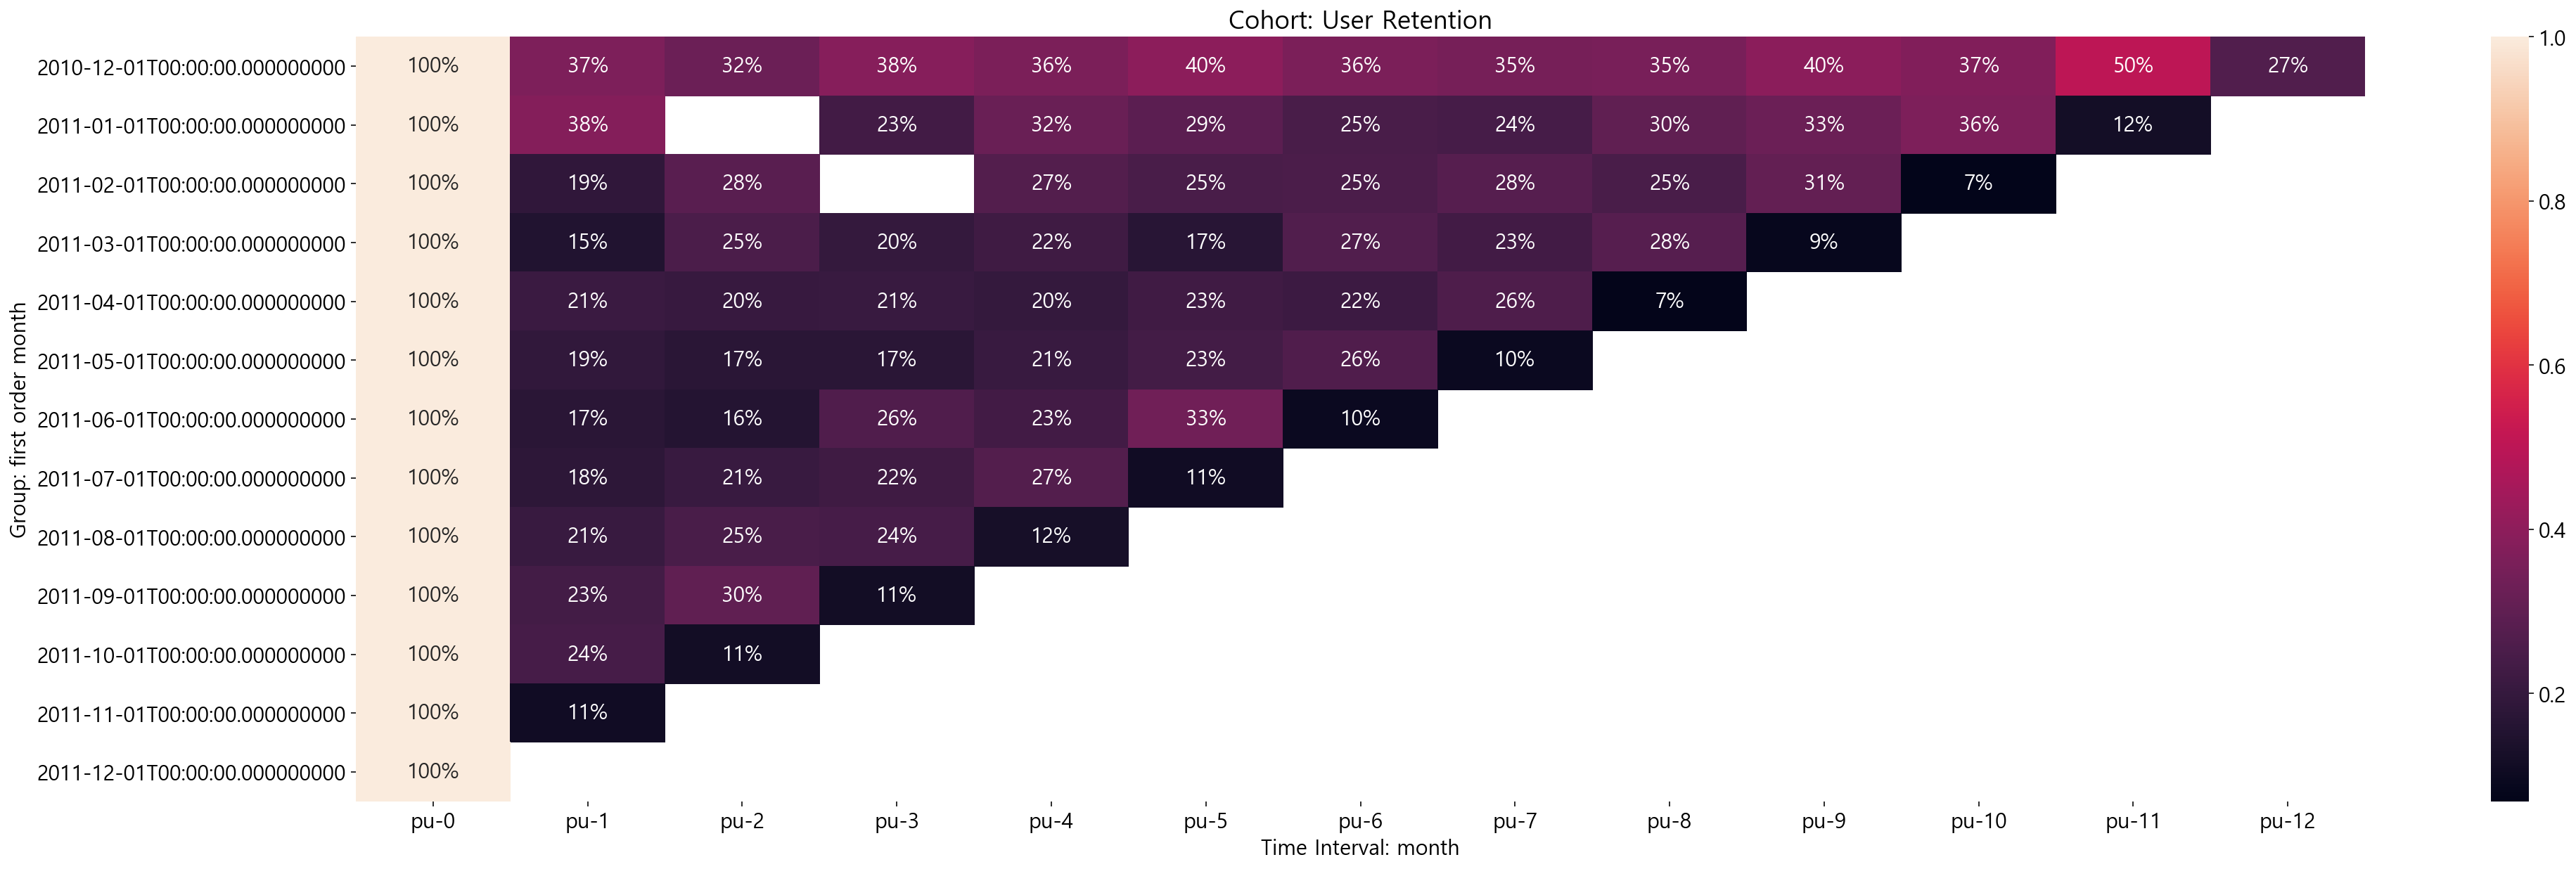

In [68]:
# 코호트 테이블을 시각화해 그룹별 유저 리텐션율을 확인합니다.
plt.figure(figsize=(32, 10))
sns.heatmap(cohort_relative, mask=cohort_relative.isnull(), annot=True, fmt='.0%')
plt.title("Cohort: User Retention")
plt.xlabel("Time Interval: month")
plt.ylabel('Group: first order month')

In [69]:
# 2010-12부터 2011-11까지 총 12개 그룹에 대한 평균 리텐션율을 구합니다.
all = []
for i in range(0, 12):
    print(f"{i+1}번 그룹의 평균 리텐션율은 {np.nanmean(cohort_relative.iloc[i, 1:]) * 100:.0f}% 입니다.") # 첫 구매월은 리텐션율이 무조건 100%가 나오므로 제외합니다.
    all.append(np.nanmean(cohort_relative.iloc[i, 1:]) * 100)

print("=" * 50)    
print(f"12개 그룹의 평균 리텐션율은 {np.mean(all):.0f}% 입니다.")
print(f"2010-12월을 제외한 그룹의 평균 리텐션율은 {np.mean(all[1:]):.0f}% 입니다.")

1번 그룹의 평균 리텐션율은 37% 입니다.
2번 그룹의 평균 리텐션율은 28% 입니다.
3번 그룹의 평균 리텐션율은 24% 입니다.
4번 그룹의 평균 리텐션율은 21% 입니다.
5번 그룹의 평균 리텐션율은 20% 입니다.
6번 그룹의 평균 리텐션율은 19% 입니다.
7번 그룹의 평균 리텐션율은 21% 입니다.
8번 그룹의 평균 리텐션율은 20% 입니다.
9번 그룹의 평균 리텐션율은 21% 입니다.
10번 그룹의 평균 리텐션율은 22% 입니다.
11번 그룹의 평균 리텐션율은 18% 입니다.
12번 그룹의 평균 리텐션율은 11% 입니다.
12개 그룹의 평균 리텐션율은 22% 입니다.
2010-12월을 제외한 그룹의 평균 리텐션율은 20% 입니다.


### comment_6
2010-12월에 첫 가입한 고객의 리텐션율이 평균 37%로 전체 그룹 중에서 가장 높고, PU도 가장 많습니다.

이외 그룹의 평균 리텐션율은 20%이고 PU도 2010-12월에 비해 적습니다.

향후 비즈니스 시나리오 작성시, 2010-12월의 전반적인 운영 히스토리 확인이 필요합니다.

## 고객 세그먼트(RFM을 활용한 K-means 군집분석)

RFM 모델을 통해 고객을 구분하고 구매 가능성이 높은 고객층을 선정하겠습니다.

고객별 1) 제일 최근에 구매한 시기 2) 구매 빈도 3) 구매한 총 금액을 기준으로 RFM 지표를 계산하겠습니다.

In [70]:
# 가장 마지막 구매일을 확인합니다.
data["invoicedate"].max()

Timestamp('2011-12-09 12:50:00')

In [71]:
# 고객별 마지막 구매일을 구합니다.
query = """
    SELECT customerid, MAX(invoicedate) AS max_dt, "2011-12-10" AS end_dt
    FROM data
    GROUP BY customerid;
"""
tmp = sqldf(query, locals())
tmp

,customerid,max_dt,end_dt
0,12346.0,2011-01-18 10:01:00.000000,2011-12-10
1,12347.0,2011-12-07 15:52:00.000000,2011-12-10
2,12348.0,2011-09-25 13:13:00.000000,2011-12-10
3,12349.0,2011-11-21 09:51:00.000000,2011-12-10
4,12350.0,2011-02-02 16:01:00.000000,2011-12-10
...,...,...,...
4334,18280.0,2011-03-07 09:52:00.000000,2011-12-10
4335,18281.0,2011-06-12 10:53:00.000000,2011-12-10
4336,18282.0,2011-12-02 11:43:00.000000,2011-12-10
4337,18283.0,2011-12-06 12:02:00.000000,2011-12-10


In [72]:
# 전체 데이터 중 마지막 구매일은 2011-12-09입니다.
# 2011-12-10으로부터 고객별  마지막 구매일의 날짜 간격을 구합니다.
query = """
    SELECT customerid, CAST((julianday(end_dt) - julianday(max_dt)) AS integer) AS recency 
    FROM tmp
"""
recency = sqldf(query, locals())
recency

,customerid,recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [73]:
# 고객별 주문 수와 총 구매 금액을 구합니다.
query = """
    SELECT customerid, COUNT(DISTINCT invoicedate) AS frequency, SUM(quantity * unitprice) AS monetary
    FROM data
    GROUP BY customerid;
"""
fm = sqldf(query, locals())
fm

,customerid,frequency,monetary
0,12346.0,1,77183.60
1,12347.0,7,4310.00
2,12348.0,4,1797.24
3,12349.0,1,1757.55
4,12350.0,1,334.40
...,...,...,...
4334,18280.0,1,180.60
4335,18281.0,1,80.82
4336,18282.0,2,178.05
4337,18283.0,16,2094.88


In [74]:
# 위에서 구한 recency, frequency, monetary 데이터를 하나의 테이블로 병합합니다.
query = """
    SELECT A.customerid, recency, frequency, monetary
    FROM recency A
    LEFT JOIN fm B ON A.customerid = B.customerid;
"""
rfm = sqldf(query, locals())
rfm

,customerid,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [75]:
# rfm 항목별 단위가 다르기 때문에 정규화를 진행합니다.
from sklearn.preprocessing import StandardScaler

df = rfm.copy()
rfm_normalize = df.drop(["customerid"], axis=1)
standard_scaler = StandardScaler()
rfm_normalize = standard_scaler.fit_transform(rfm_normalize)
rfm_normalize = pd.DataFrame(rfm_normalize)
rfm_normalize.columns = ['recency','frequency','monetary']
rfm_normalize

,recency,frequency,monetary
0,2.329673,-0.425384,8.359634
1,-0.900449,0.359759,0.251046
2,-0.170421,-0.032812,-0.028546
3,-0.740443,-0.425384,-0.032963
4,2.179667,-0.425384,-0.191315
...,...,...,...
4334,1.849655,-0.425384,-0.208429
4335,0.879618,-0.425384,-0.219531
4336,-0.850447,-0.294527,-0.208712
4337,-0.890448,1.537473,0.004572


Text(0, 0.5, 'SSE')

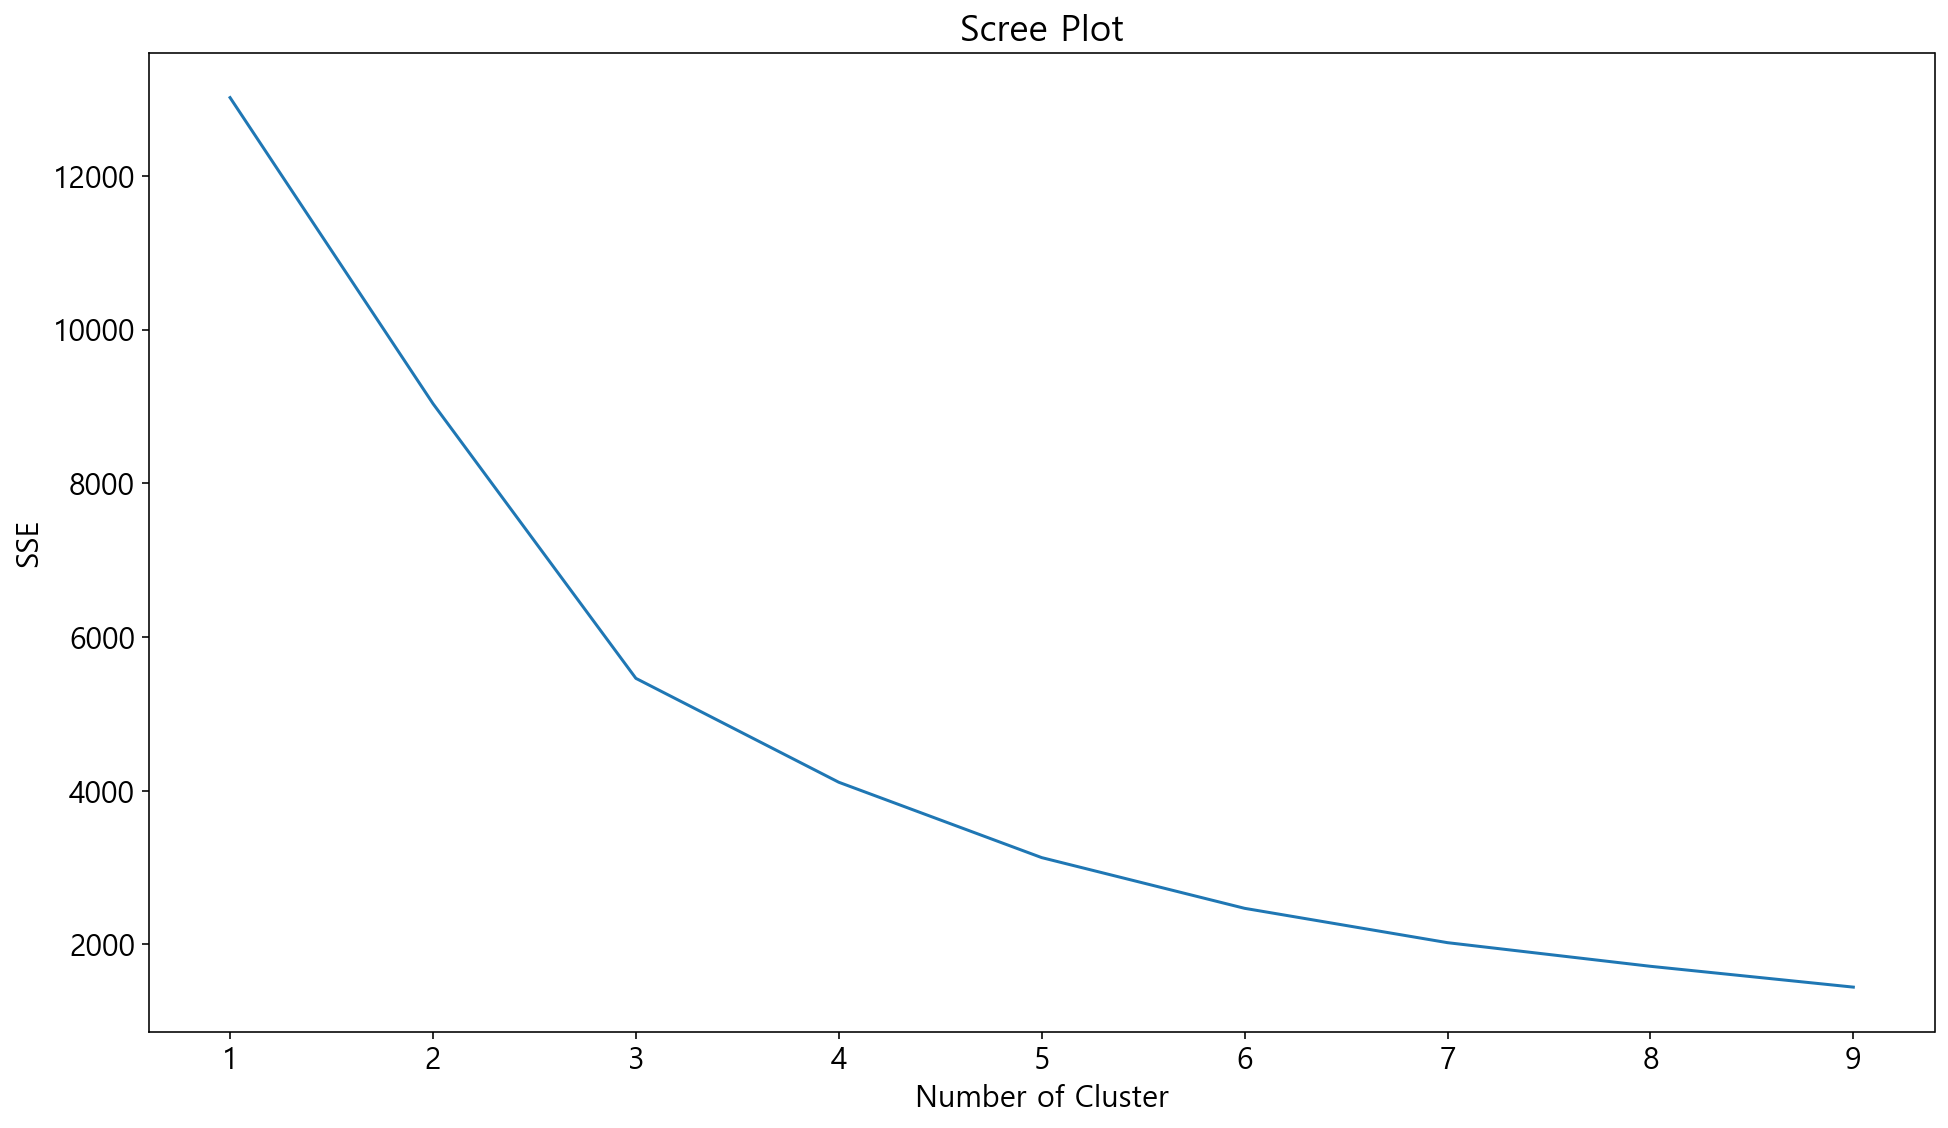

In [76]:
# 비계층적 군집 분석 방법인 K-means clustering을 사용합니다.
# 적절한 군집 수를 확인하기 위해 scree plot을 출력합니다.
# 오차제곱합 SSE(Sum of Squared Error)가 급격히 줄어드는 지점에서 cluster 개수를 설정하겠습니다.
from sklearn.cluster import KMeans

sse = []
for num_clusters in list(range(1,10)):
    km = KMeans(n_clusters = num_clusters, random_state=30, max_iter=1000)
    km.fit(rfm_normalize)
    sse.append(km.inertia_)

fig, ax = plt.subplots(figsize=[16, 9])
sns.lineplot(range(1, 10), sse)
plt.title("Scree Plot")
plt.xlabel("Number of Cluster")
plt.ylabel('SSE')

In [78]:
# cluster 개수를 3개로 설정하고 k-means 분석을 진행합니다.
km = KMeans(n_clusters = 3, max_iter=1000, random_state=30)
y_km = km.fit_predict(rfm_normalize)

rfm_km = pd.concat([rfm_normalize, pd.Series(y_km)], axis=1)
rfm_km.columns = [ 'recency', 'frequency', 'monetary', 'clusterid']
rfm_km

,recency,frequency,monetary,clusterid
0,2.329673,-0.425384,8.359634,0
1,-0.900449,0.359759,0.251046,2
2,-0.170421,-0.032812,-0.028546,2
3,-0.740443,-0.425384,-0.032963,2
4,2.179667,-0.425384,-0.191315,0
...,...,...,...,...
4334,1.849655,-0.425384,-0.208429,0
4335,0.879618,-0.425384,-0.219531,0
4336,-0.850447,-0.294527,-0.208712,2
4337,-0.890448,1.537473,0.004572,2


In [79]:
rfm_cluster = pd.concat([rfm, rfm_km["clusterid"]], axis=1)
rfm_cluster

,customerid,recency,frequency,monetary,clusterid
0,12346.0,325,1,77183.60,0
1,12347.0,2,7,4310.00,2
2,12348.0,75,4,1797.24,2
3,12349.0,18,1,1757.55,2
4,12350.0,310,1,334.40,0
...,...,...,...,...,...
4334,18280.0,277,1,180.60,0
4335,18281.0,180,1,80.82,0
4336,18282.0,7,2,178.05,2
4337,18283.0,3,16,2094.88,2


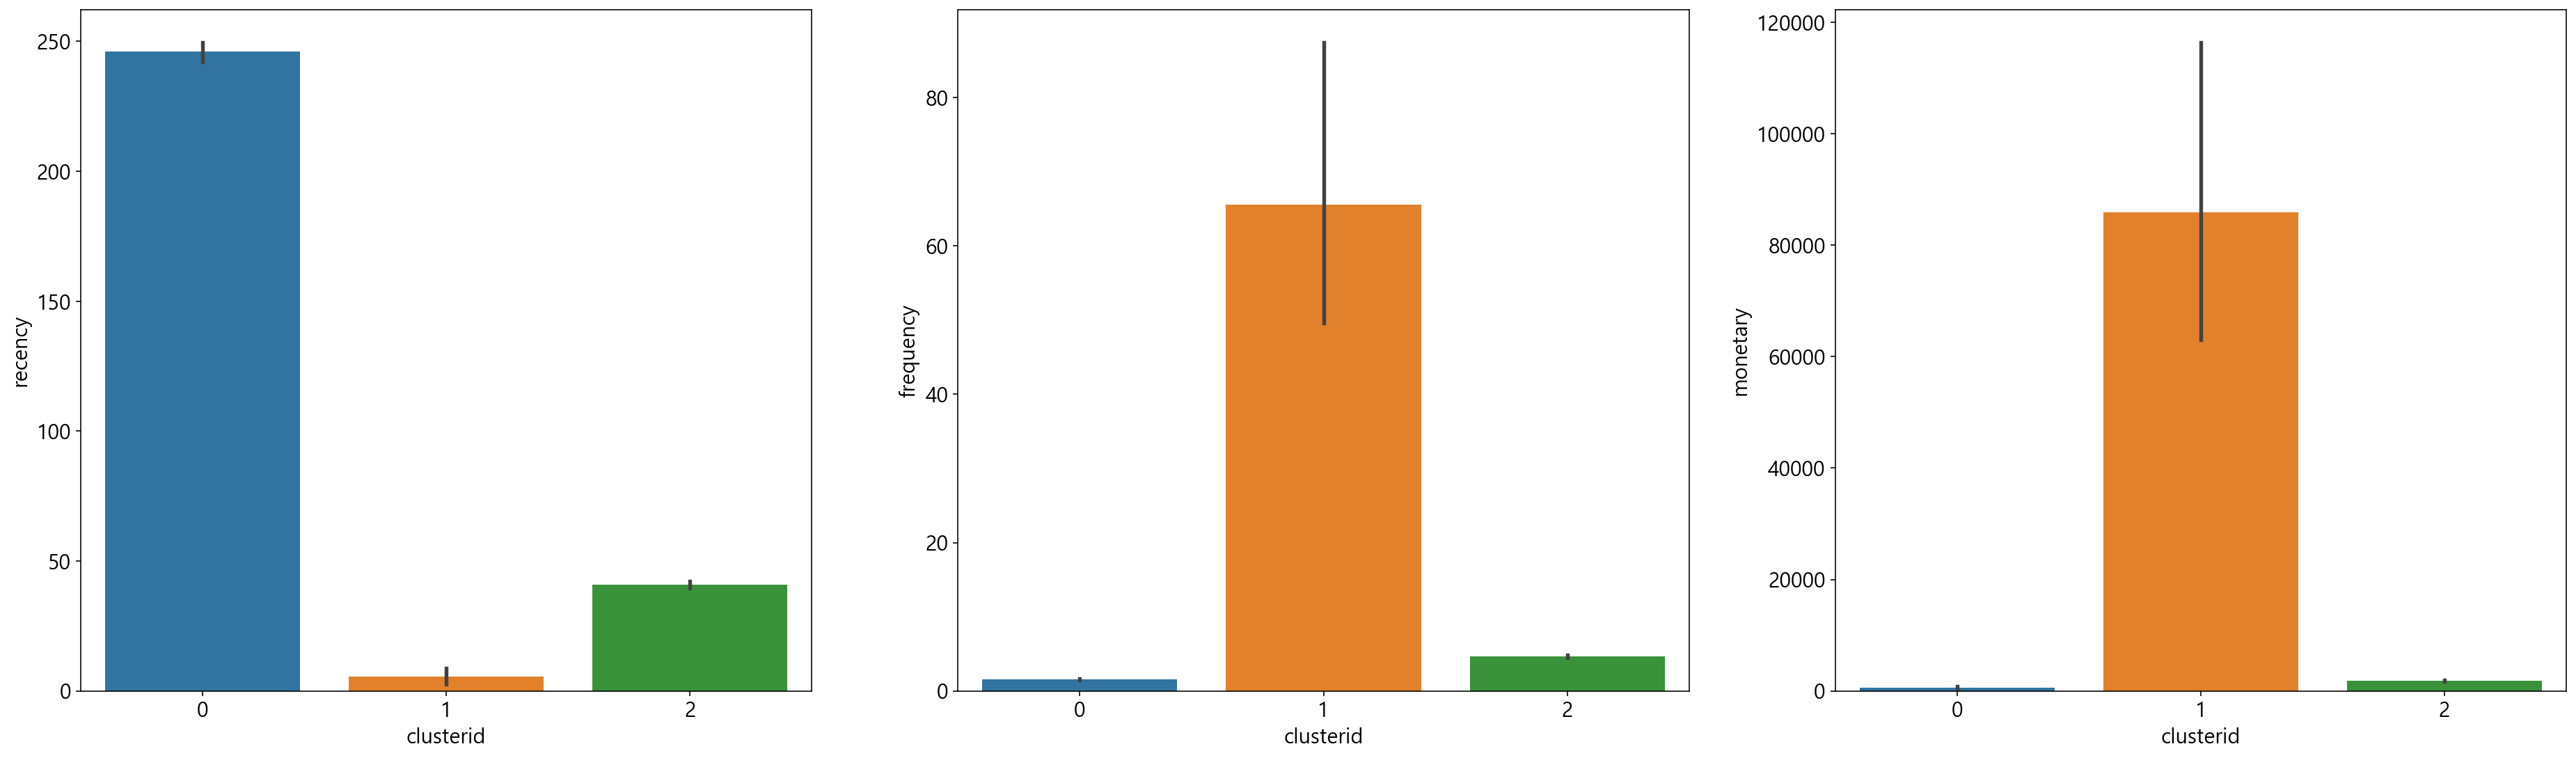

In [82]:
# 군집별 Recency, Frequency, Monetary 수치를 시각화를 통해 확인합니다.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=[32,9])
sns.barplot(x="clusterid", y="recency", data=rfm_cluster, ax=ax1)
sns.barplot(x="clusterid", y="frequency", data=rfm_cluster, ax=ax2)
sns.barplot(x="clusterid", y="monetary", data=rfm_cluster, ax=ax3)

### comment_7
clusterid 0 그룹은 최근 구매 날짜가 평균 8개월 전으로 이탈 고객층으로 보입니다.

clusterid 1 그룹은 구매도 자주 하고 구매 금액도 높은 고객층으로 VIP로 확인됩니다.

clusterid 2 그룹은 최근 구매 날짜가 평균 1~2개월 전으로 최근에 유입되었지만 구매 빈도나 구매 금액이 적은 고객층입니다.

지금까지 분석한 결과를 바탕으로 아래와 같이 비즈니스 시나리오를 생각할 수 있습니다.

주어진 데이터로 손익 현황을 파악하기 어렵기 때문에 단순히 거래액 관점에서 3가지 액션 플랜을 세웠습니다.

1. 목표 달성 난이도 下 -> VIP 고객을 계속 lock-in 할 수 있도록 VIP 관리에 집중합니다.

2. 목표 달성 난이도 中 -> clusterid1 고객층 대상으로 판촉을 시행합니다. 판촉비 투입 대비 발생한 거래액 지표 ROAS를 바탕으로 판촉 자원을 효율적으로 운영합니다.

3. 목표 달성 난이도 上 -> 이탈 고객을 복귀시키고 신규 고객을 확보합니다. 고객별 첫 구매 상품을 파악 후 hooking을 통해 고객을 확보합니다. 이탈 고객을 대상으로 판촉자원(쿠폰, 포인트 등)을 투자해 구매 촉진을 유발합니다.